<a href="https://colab.research.google.com/github/SharatGupta/DSML-Projects/blob/main/Walmart%20CI%20%26%20CLT%20Case%20Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Walmart**

Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.

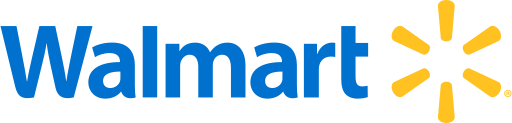

# **Business Problem**

Analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions.

* Analyze spending habits difference between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female)

* Perform the same activity for Married vs Unmarried and Age

* Finally calculate confidence intervals for each analysis

* Give Bussiness Insights & Recommendations to make changes or improvements

# **Desired Outcome of Analysis**

* Average spend based on Gender, Age, Marital status and other paramaeters
* Find Population mean, 90%,95%,99% Confidence intervals using Centre Limit Theorem  for all above paramters








# **Data Import and Basic Metric Analysis**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [2]:
data = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv")

# "dataC" - This will be used for changing some Numerical to Categorical,
# Whereas "data" will be used for Correlation, scatterplot & whereever indepth analysis required

In [ ]:
data.shape

(550068, 10)

In [ ]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [ ]:
data.index

RangeIndex(start=0, stop=550068, step=1)

In [ ]:
data.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [ ]:
# Checking Value Count of Each Category
for i in data.columns:
  print(i, "Nunique values :", data[i].nunique(),", Max :", data[i].max(),", Min :",data[i].min())
  print("------------------------------------------------------------------------------------------------")

User_ID Nunique values : 5891 , Max : 1006040 , Min : 1000001
------------------------------------------------------------------------------------------------
Product_ID Nunique values : 3631 , Max : P0099942 , Min : P00000142
------------------------------------------------------------------------------------------------
Gender Nunique values : 2 , Max : M , Min : F
------------------------------------------------------------------------------------------------
Age Nunique values : 7 , Max : 55+ , Min : 0-17
------------------------------------------------------------------------------------------------
Occupation Nunique values : 21 , Max : 20 , Min : 0
------------------------------------------------------------------------------------------------
City_Category Nunique values : 3 , Max : C , Min : A
------------------------------------------------------------------------------------------------
Stay_In_Current_City_Years Nunique values : 5 , Max : 4+ , Min : 0
----------------------

In [ ]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [ ]:
data.describe(include = object)

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


In [5]:
for i in data.columns:
  print(data[i].value_counts())
  print("-------------------------------------")

1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002690       7
1002111       7
1005810       7
1004991       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64
-------------------------------------
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: Product_ID, Length: 3631, dtype: int64
-------------------------------------
M    414259
F    135809
Name: Gender, dtype: int64
-------------------------------------
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64
-------------------------------------
4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8

* There are 5891 unique customers from
* Customer are of both M & F gender
* There are customers from 7 different age groups
* Customer are from 21 Different Occupations
* Customers comprise of both mariied & Singles
* Customer comprise of all 3 City Categories
* Customer Stay in Current City varies from 0 to 4+ Years
* Customer Purchase value varies from 12 ~ 23961$

# **Data Cleaning - Duplicates,Null Values & Outliers**

In [8]:
data.drop_duplicates()

KeyboardInterrupt: ignored

# **Correlation among Data**

In [ ]:
data.corr()

<ipython-input-11-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


<ipython-input-12-48d00ee6b6e4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,cmap = "Greens")


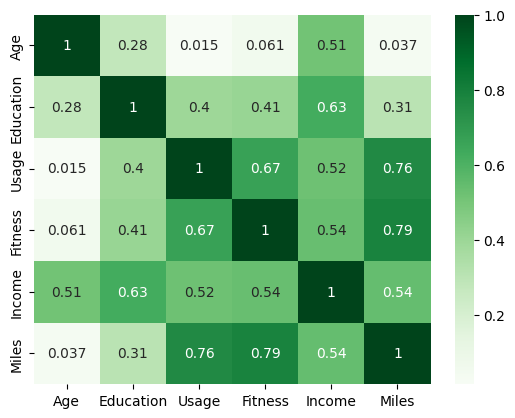

In [ ]:
sns.heatmap(data.corr(),annot=True,cmap = "Greens")
plt.show()

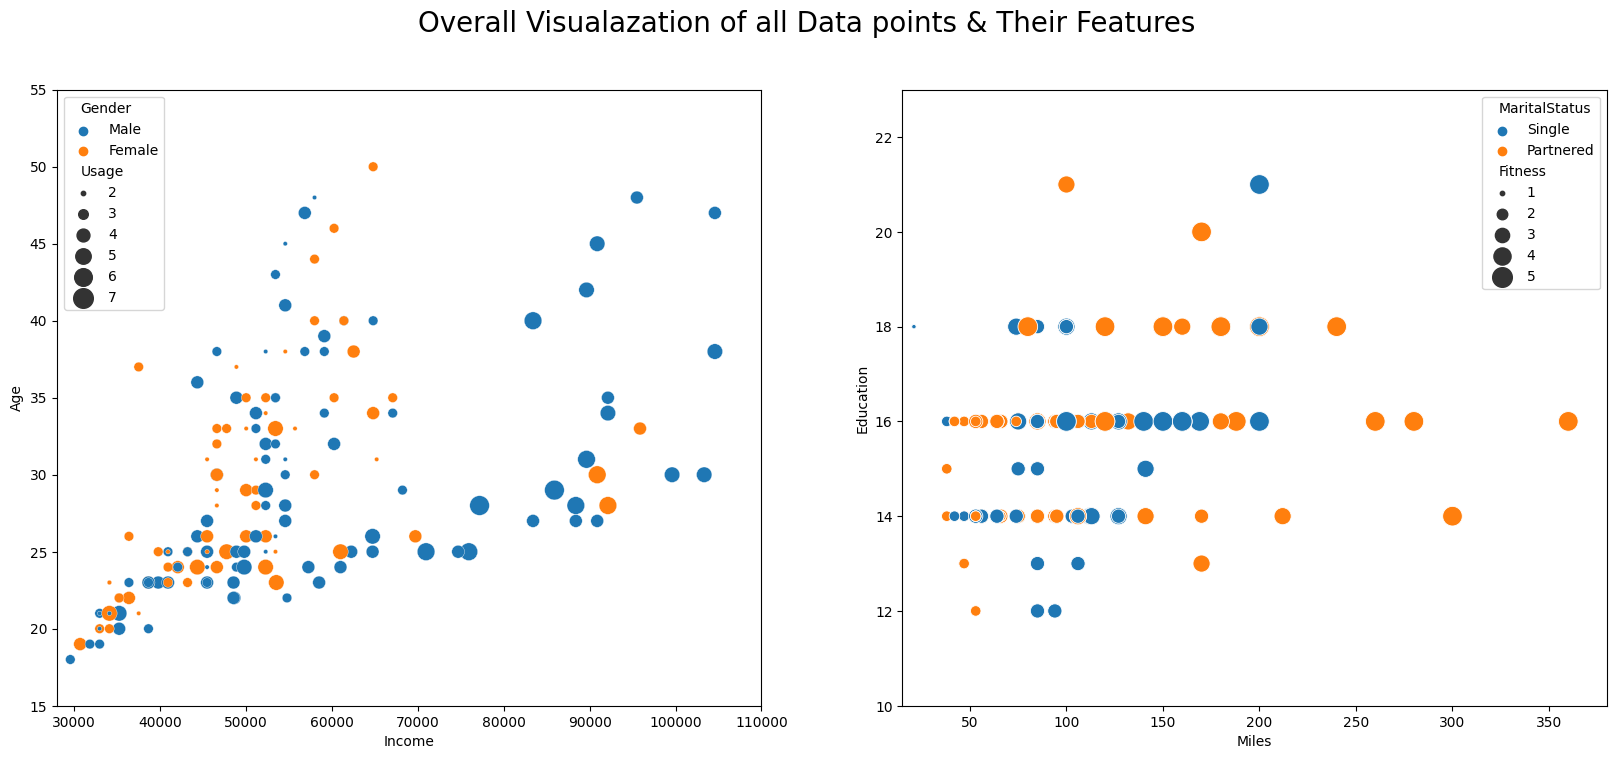

In [ ]:
plt.figure(figsize = (20,8))
plt.suptitle("Overall Visualazation of all Data points & Their Features",size = 20)
plt.subplot(1,2,1)
plt.xlim(28000,110000)
plt.ylim(15,55)
sns.scatterplot(data=data,y="Age",hue="Gender", x ="Income",size= "Usage",sizes = (10,200))
plt.subplot(1,2,2)
plt.xlim(15,380)
plt.ylim(10,23)
sns.scatterplot(data=data,x="Miles",size = "Fitness", y = "Education",hue = "MaritalStatus",sizes = (10,200))
plt.show()

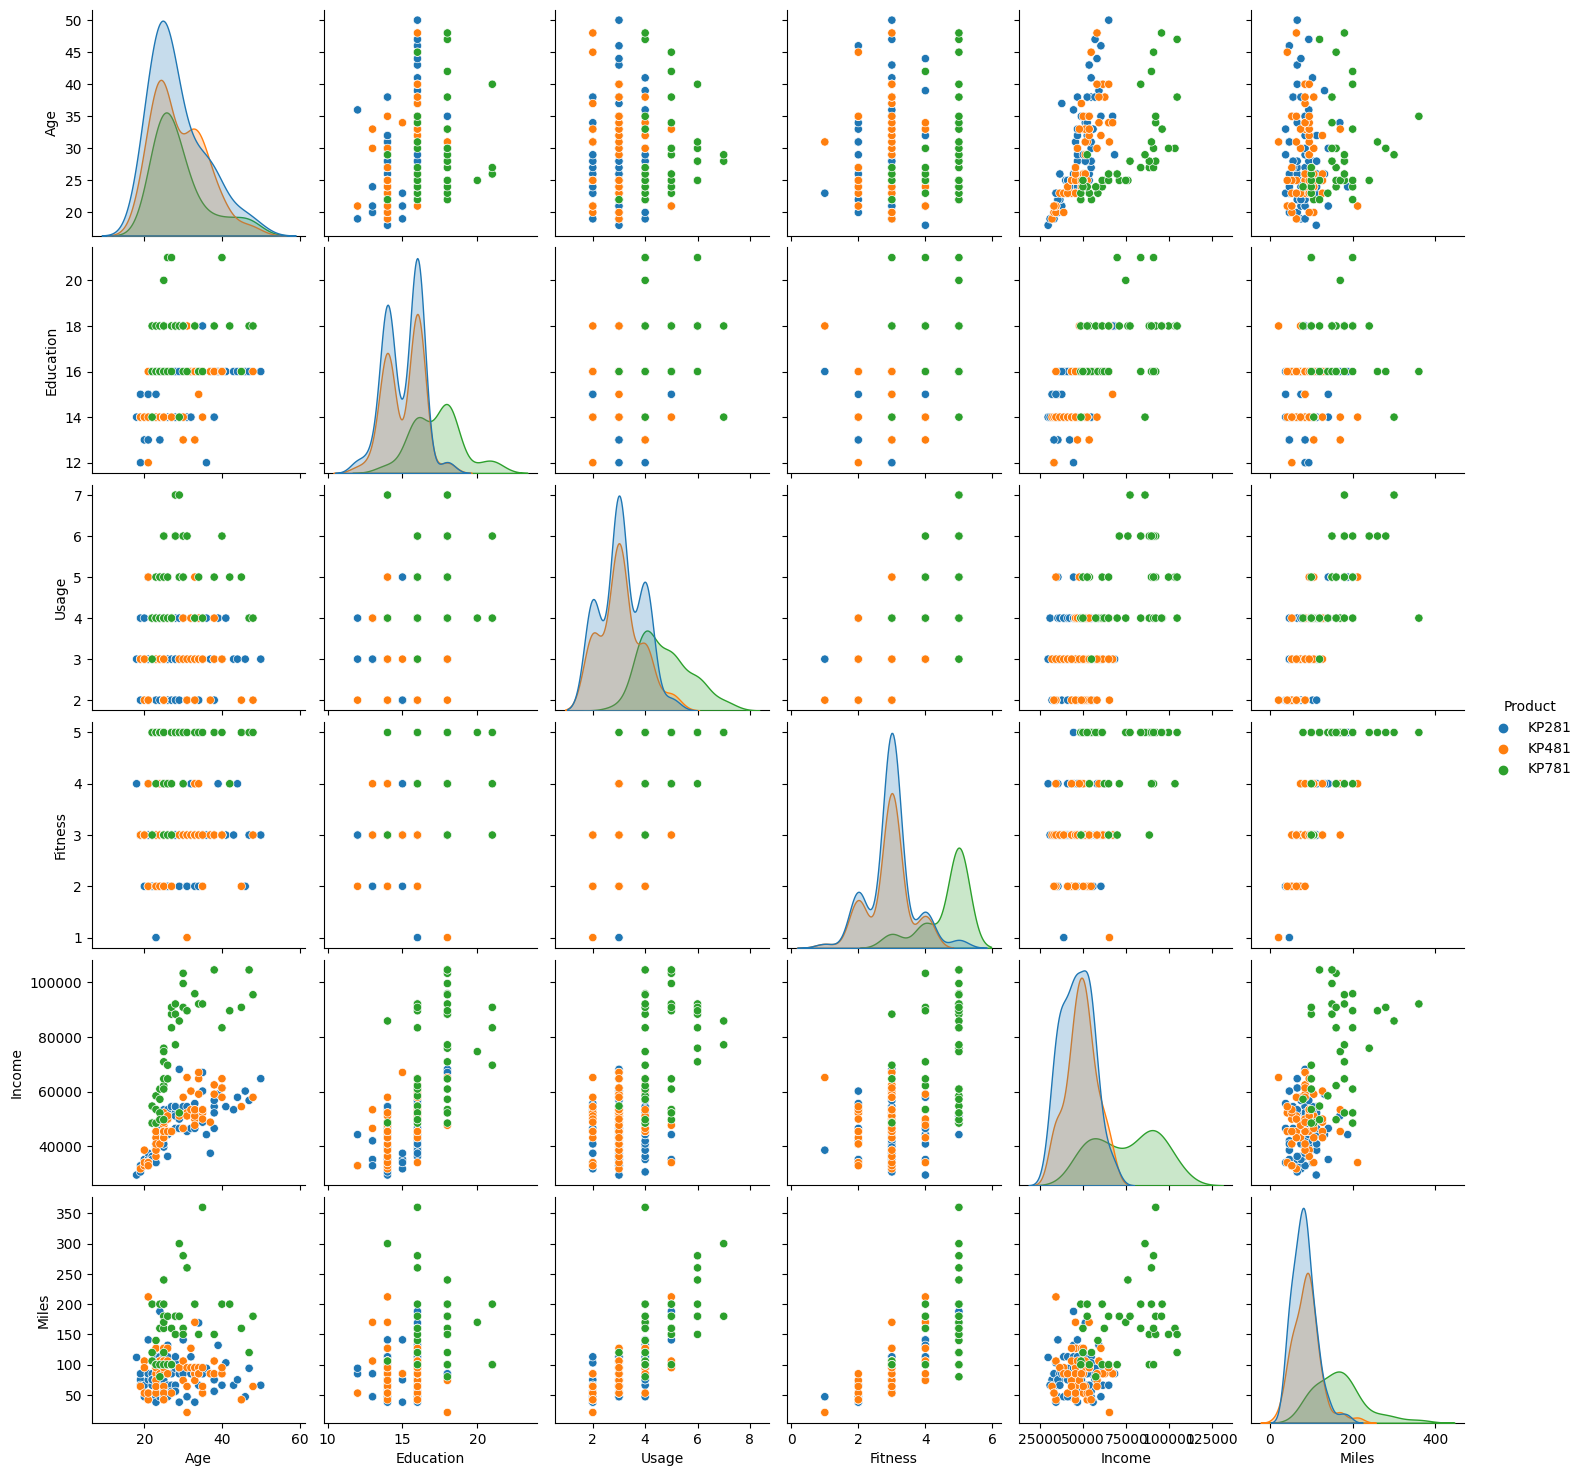

In [ ]:
sns.pairplot(data,hue="Product")


* All Features are Positively correlated
* Higher the Fitness Rating --> Higher the Usage also Higher Miles in a week
* Higher the Education --> Higher the Annual Income
* On an average people with higher income are having higher usage

# **Checking for Outliers**

<Axes: xlabel='Product', ylabel='Usage'>

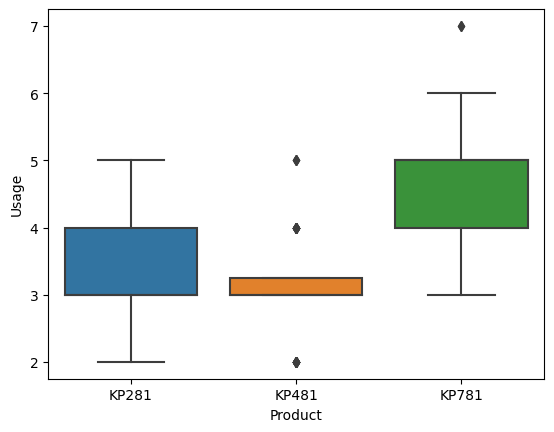

In [ ]:
sns.boxplot(data= data , y= "Usage", x ="Product")

<Axes: xlabel='Product', ylabel='Miles'>

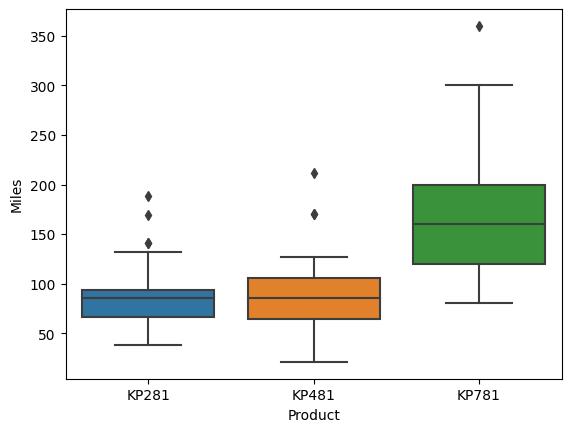

In [ ]:
sns.boxplot(data= data , y= "Miles", x ="Product")

<Axes: xlabel='Product', ylabel='Education'>

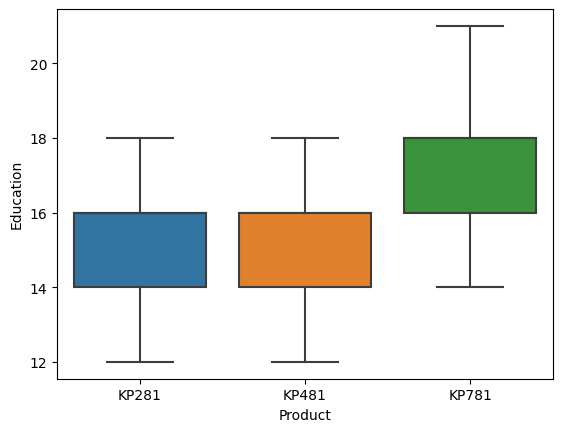

In [ ]:
sns.boxplot(data= data , y= "Education", x ="Product")

<Axes: xlabel='Product', ylabel='Income'>

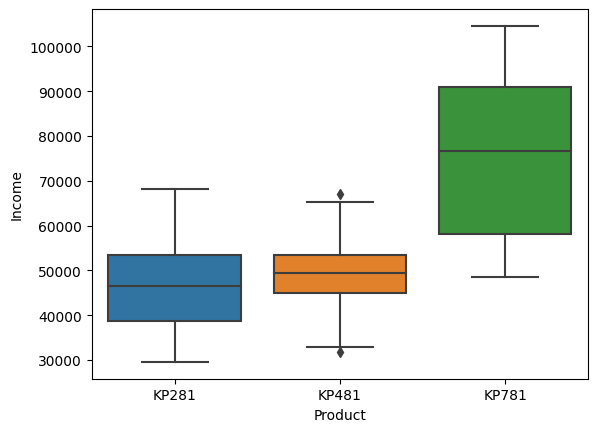

In [ ]:
sns.boxplot(data= data , y= "Income", x ="Product")

<Axes: xlabel='Product', ylabel='Age'>

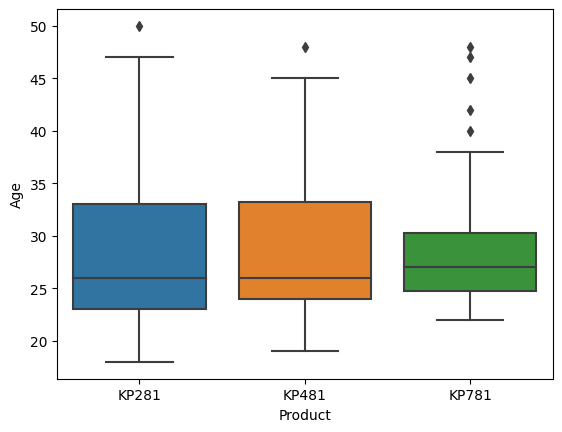

In [ ]:
sns.boxplot(data= data , y= "Age", x ="Product")

<Axes: xlabel='Product', ylabel='Fitness'>

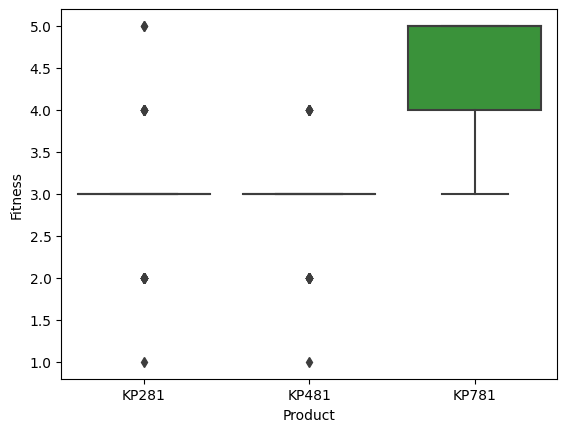

In [ ]:
sns.boxplot(data= data , y= "Fitness", x ="Product")

# **Finding IQR,Upperlimit & Lowerlimit for each product**

In [ ]:
datakp781=data[data["Product"] == "KP781"]
datakp481=data[data["Product"] == "KP481"]
datakp281=data[data["Product"] == "KP281"]

In [ ]:
# for KP281 Product
print("Feature : IQR, Lower_Limit, Quantile25, Quantile75, Upper_Limit")
droplist281=[]
for x in ("Education","Age","Income","Usage","Miles","Fitness"):
  IQR = np.percentile(datakp281[x],75)- np.percentile(datakp281[x],25)
  lower_limit = max (np.percentile(datakp281[x],25) - 1.5*IQR,0)
  upper_limit = np.percentile(datakp281[x],75) + 1.5*IQR
  droplist281.extend(list(np.where( (datakp281[x]>upper_limit) | (datakp281[x]<lower_limit) )[0]))
  print(x,":", IQR,lower_limit,np.percentile(datakp281[x],25),np.percentile(datakp281[x],75),upper_limit)
print("Outliers implicit indices for KP281:",droplist281)

Feature : IQR, Lower_Limit, Quantile25, Quantile75, Upper_Limit
Education : 2.0 11.0 14.0 16.0 19.0
Age : 10.0 8.0 23.0 33.0 48.0
Income : 14781.0 16486.5 38658.0 53439.0 75610.5
Usage : 1.0 1.5 3.0 4.0 5.5
Miles : 28.0 24.0 66.0 94.0 136.0
Fitness : 0.0 3.0 3.0 3.0 3.0
Outliers implicit indices for KP281: [79, 8, 23, 53, 61, 0, 4, 8, 11, 14, 19, 23, 25, 29, 31, 32, 34, 36, 39, 41, 51, 53, 55, 56, 57, 59, 61, 62, 72, 76, 77]


In [ ]:
# for KP481 Product
print("Feature : IQR, Lower_Limit,quantile25,quantile75 Upper_Limit")
droplist481=[]
for x in ("Education","Age","Income","Usage","Miles","Fitness"):
  IQR = np.percentile(datakp481[x],75)- np.percentile(datakp481[x],25)
  lower_limit = max (np.percentile(datakp481[x],25) - 1.5*IQR,0)
  upper_limit = np.percentile(datakp481[x],75) + 1.5*IQR
  droplist481.extend(list(np.where( (datakp481[x]>upper_limit) | (datakp481[x]<lower_limit) )[0]))
  print(x,":", IQR,lower_limit,np.percentile(datakp481[x],25),np.percentile(datakp481[x],75),upper_limit)
print("Outliers implicit indices for KP481:",droplist481)

Feature : IQR, Lower_Limit,quantile25,quantile75 Upper_Limit
Education : 2.0 11.0 14.0 16.0 19.0
Age : 9.25 10.125 24.0 33.25 47.125
Income : 8527.5 32120.25 44911.5 53439.0 66230.25
Usage : 0.25 2.625 3.0 3.25 3.625
Miles : 42.0 1.0 64.0 106.0 169.0
Fitness : 0.0 3.0 3.0 3.0 3.0
Outliers implicit indices for KP481: [59, 0, 47, 1, 4, 5, 6, 10, 17, 19, 20, 22, 23, 25, 26, 27, 28, 29, 30, 31, 34, 36, 37, 38, 40, 41, 43, 45, 52, 53, 58, 59, 4, 23, 40, 4, 5, 6, 11, 12, 14, 15, 18, 19, 24, 26, 29, 31, 37, 40, 44, 46, 48, 49, 50, 58]


In [ ]:
len(droplist281)

31

In [ ]:
# for KP781 Product
print("Feature : IQR, Lower_Limit,quantile25,quantile75 Upper_Limit")
droplist781=[]
for x in ("Education","Age","Income","Usage","Miles","Fitness"):
  IQR = np.percentile(datakp781[x],75)- np.percentile(datakp781[x],25)
  lower_limit = max (np.percentile(datakp781[x],25) - 1.5*IQR,0)
  upper_limit = np.percentile(datakp781[x],75) + 1.5*IQR
  droplist781.extend(list(np.where( (datakp781[x]>upper_limit) | (datakp781[x]<lower_limit) )[0]))
  print(x,":", IQR,lower_limit,np.percentile(datakp781[x],25),np.percentile(datakp781[x],75),upper_limit)
print("Outliers implicit indices for KP781:",droplist781)

Feature : IQR, Lower_Limit,quantile25,quantile75 Upper_Limit
Education : 2.0 13.0 16.0 18.0 21.0
Age : 5.5 16.5 24.75 30.25 38.5
Income : 32681.25 9182.875 58204.75 90886.0 139907.875
Usage : 1.0 2.5 4.0 5.0 6.5
Miles : 80.0 0.0 120.0 200.0 320.0
Fitness : 1.0 2.5 4.0 5.0 6.5
Outliers implicit indices for KP781: [35, 36, 37, 38, 39, 23, 26, 33]


* As per IQR analysis of all feature in each product
* There are
* 8 outlier in KP781
* 56 outlier in KP481
* 31 outlier in KP281







# **Data Statistical Analysis & Visualization for Each Product**

In [ ]:
datakp281.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,80.000000,80.000000,80.000000,80.00000,80.00000,80.000000
mean,28.550000,15.037500,3.087500,2.96250,46418.02500,82.787500
std,7.221452,1.216383,0.782624,0.66454,9075.78319,28.874102
min,18.000000,12.000000,2.000000,1.00000,29562.00000,38.000000
25%,23.000000,14.000000,3.000000,3.00000,38658.00000,66.000000
50%,26.000000,16.000000,3.000000,3.00000,46617.00000,85.000000
75%,33.000000,16.000000,4.000000,3.00000,53439.00000,94.000000
max,50.000000,18.000000,5.000000,5.00000,68220.00000,188.000000


In [ ]:
datakp281.describe(include=object)

,Product,Gender,MaritalStatus
count,80,80,80
unique,1,2,2
top,KP281,Male,Partnered
freq,80,40,48


<Axes: xlabel='Miles', ylabel='Education'>

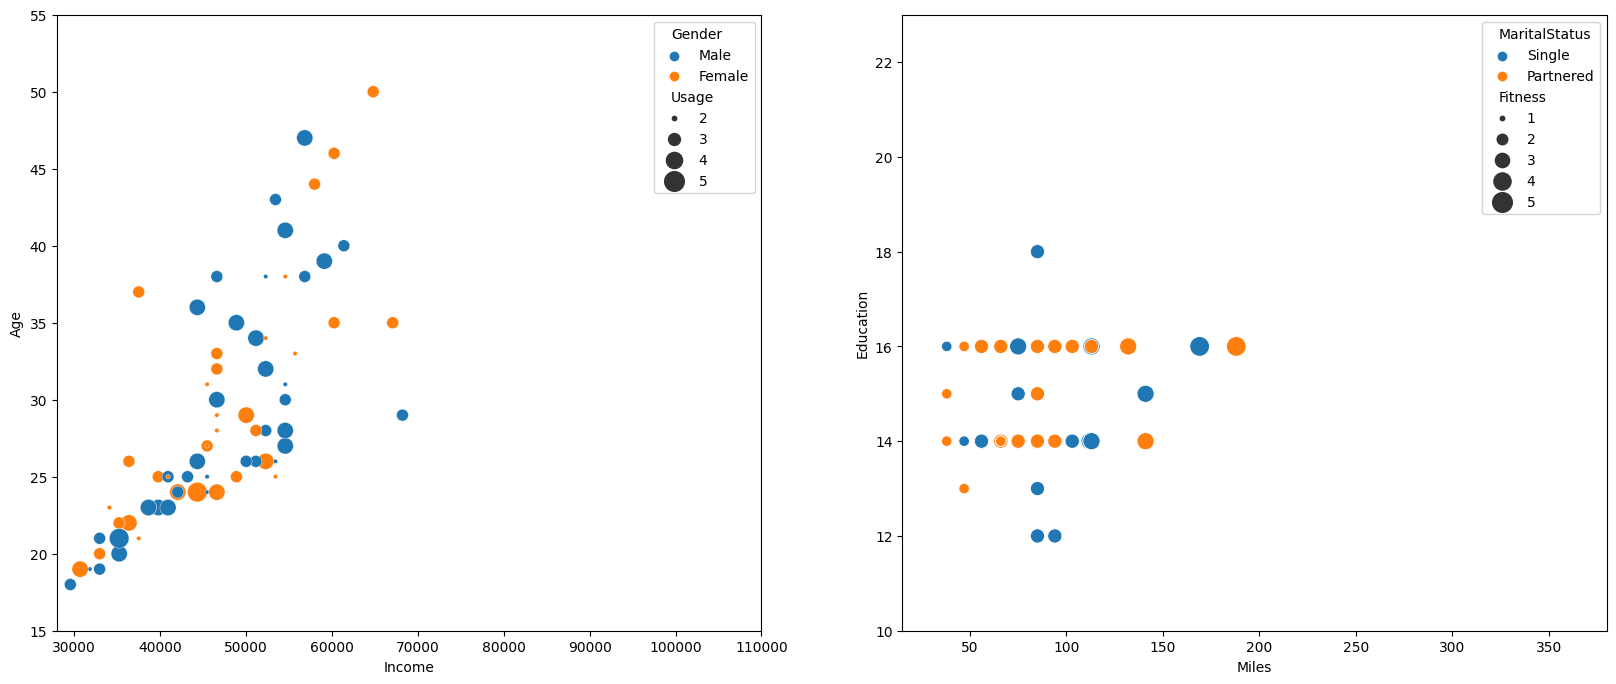

In [ ]:
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
plt.xlim(28000,110000)
plt.ylim(15,55)
sns.scatterplot(data=datakp281,y="Age",hue="Gender", x ="Income",size= "Usage",sizes = (10,200))
plt.subplot(1,2,2)
plt.xlim(15,380)
plt.ylim(10,23)
sns.scatterplot(data=datakp281,x="Miles",size = "Fitness", y = "Education",hue = "MaritalStatus",sizes = (10,200))

* KP281 Customes having income less than 70000
* Majarity of kp281 Customer are in 20's and next in 30's, however KP281 product has customers in all ages
* Maximum miles in a week for KP281 customer is < 150 Miles
* Education Year of KP281 Customers < = 16 and major customer are of 16 & 14 year education
* Male & Female eqaully prefer KP281
* KP281 Customer ussage per week <=5
* KP281 Customer Rate their fitness <=3



In [ ]:
datakp481.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,60.000000,60.000000,60.000000,60.00000,60.000000,60.000000
mean,28.900000,15.116667,3.066667,2.90000,48973.650000,87.933333
std,6.645248,1.222552,0.799717,0.62977,8653.989388,33.263135
min,19.000000,12.000000,2.000000,1.00000,31836.000000,21.000000
25%,24.000000,14.000000,3.000000,3.00000,44911.500000,64.000000
50%,26.000000,16.000000,3.000000,3.00000,49459.500000,85.000000
75%,33.250000,16.000000,3.250000,3.00000,53439.000000,106.000000
max,48.000000,18.000000,5.000000,4.00000,67083.000000,212.000000


In [ ]:
datakp481.describe(include=object)

,Product,Gender,MaritalStatus
count,60,60,60
unique,1,2,2
top,KP481,Male,Partnered
freq,60,31,36


<Axes: xlabel='Miles', ylabel='Education'>

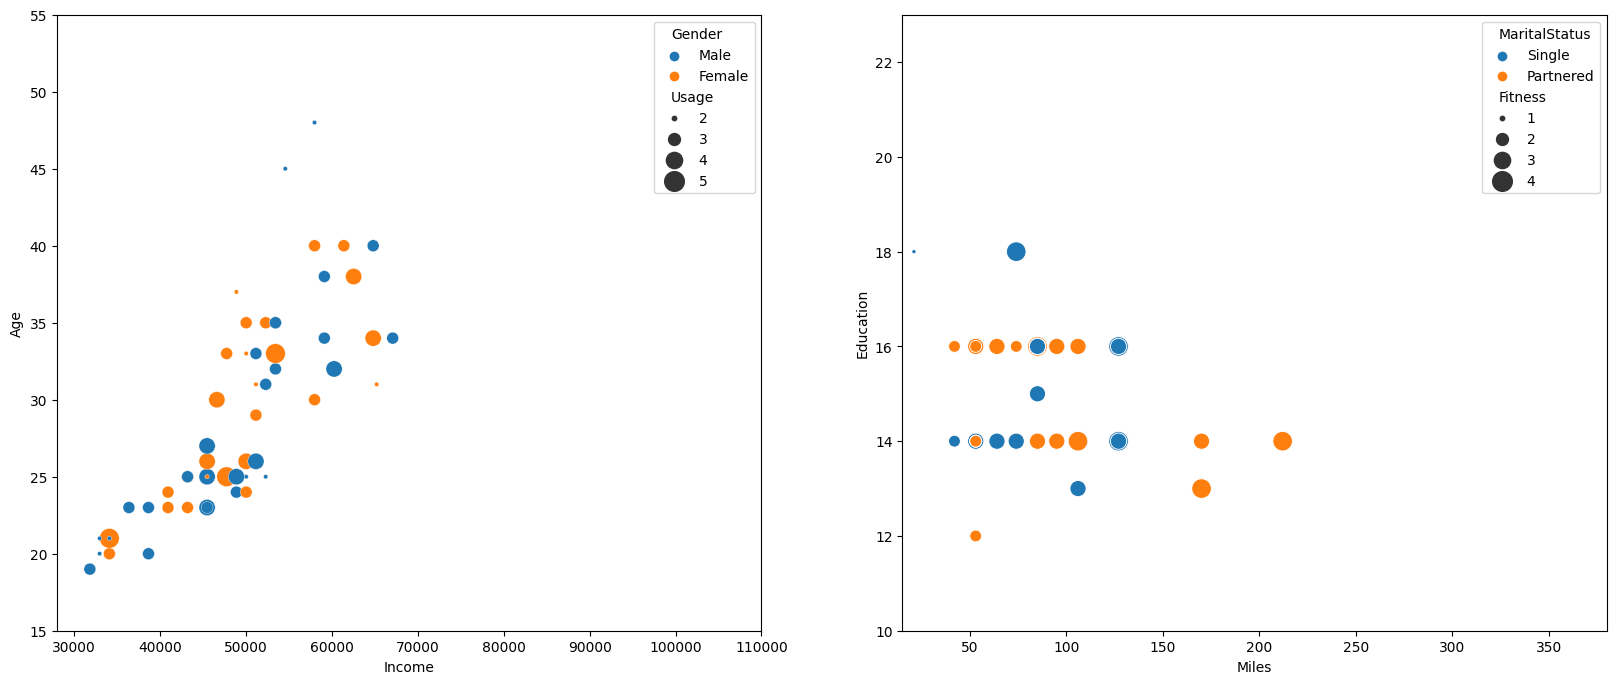

In [ ]:
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
plt.xlim(28000,110000)
plt.ylim(15,55)
sns.scatterplot(data=datakp481,y="Age",hue="Gender", x ="Income",size= "Usage",sizes = (10,200))
plt.subplot(1,2,2)
plt.xlim(15,380)
plt.ylim(10,23)
sns.scatterplot(data=datakp481,x="Miles",size = "Fitness", y = "Education",hue = "MaritalStatus",sizes = (10,200))

* 33% Customers prefered KP481
* KP481 Customes having income less than 70000 ,however 75% of them lie between 45000 ~ 70000$
* KP481 customers have age < 40,Also Customer in 30~40 mostly prefered KP481
* Maximum miles in a week for KP481 customer is < 150 Miles, Hoever 60% customers mile/week lie in range 75 ~ 150
* Education Year of KP481 Customers < = 16 and major customer are of 16 & 14 year education
* Male slightly more prefered KP481 than females
* KP481 Customer ussage per week <=5
* KP481 Customer Rate their fitness <=4
* Marital Status has no impact on selection of Product



In [ ]:
datakp781.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,40.000000,40.000000,40.000000,40.000000,40.00000,40.000000
mean,29.100000,17.325000,4.775000,4.625000,75441.57500,166.900000
std,6.971738,1.639066,0.946993,0.667467,18505.83672,60.066544
min,22.000000,14.000000,3.000000,3.000000,48556.00000,80.000000
25%,24.750000,16.000000,4.000000,4.000000,58204.75000,120.000000
50%,27.000000,18.000000,5.000000,5.000000,76568.50000,160.000000
75%,30.250000,18.000000,5.000000,5.000000,90886.00000,200.000000
max,48.000000,21.000000,7.000000,5.000000,104581.00000,360.000000


In [ ]:
datakp781.describe(include=object)

,Product,Gender,MaritalStatus
count,40,40,40
unique,1,2,2
top,KP781,Male,Partnered
freq,40,33,23


<Axes: xlabel='Miles', ylabel='Education'>

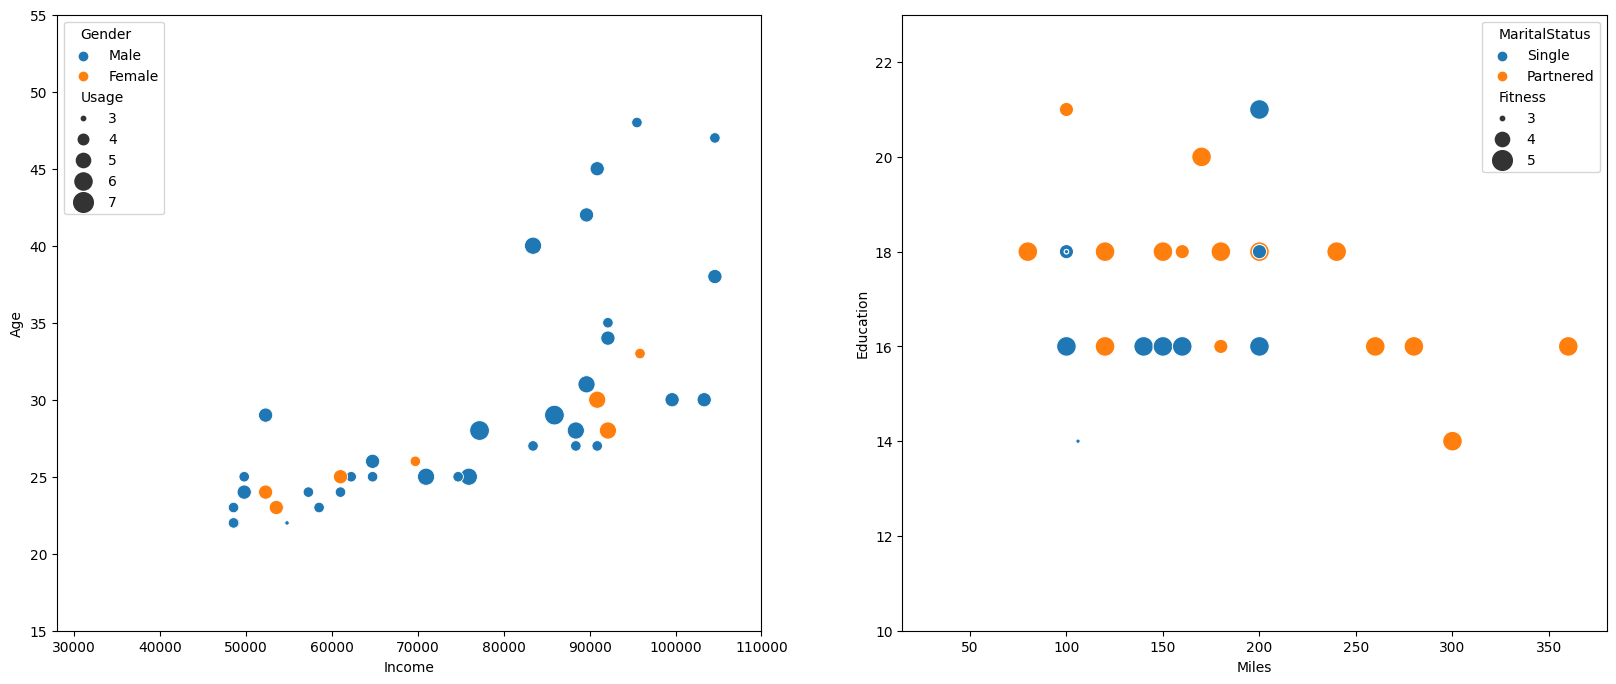

In [ ]:
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
plt.xlim(28000,110000)
plt.ylim(15,55)
sns.scatterplot(data=datakp781,y="Age",hue="Gender", x ="Income",size= "Usage",sizes = (10,200))
plt.subplot(1,2,2)
plt.xlim(15,380)
plt.ylim(10,23)
sns.scatterplot(data=datakp781,x="Miles",size = "Fitness", y = "Education",hue = "MaritalStatus",sizes = (10,200))

* 22% Customers prefered KP781
* KP781 Customes having income >45000$  ,however 58% of them have income>150000$
* KP781 customers have age > 20, 75% Customer age is in range 20~30
* Miles in a week for KP781 customer is > 75 Miles, However 58% customers run > 150 miles
* Education Year of KP781 Customers >=14 and major customer are of 18 & then 16 year education
* Male[82%] highly prefered KP781 than females[18%]
* KP781 Customer ussage per week > =3 and 45% use it 4time , 30% use it for 5 times ans 18% use >=6 in a week
* KP781 Customer Rate their fitness >=3 and 72.5% customer rate themselves to be 5 rating fitness
* Marital Status has no impact on selection of Product



# **UniVariate, Bivariate Analysis & Converting Numerical to Categoricals**

**Product**

<Axes: xlabel='count', ylabel='Product'>

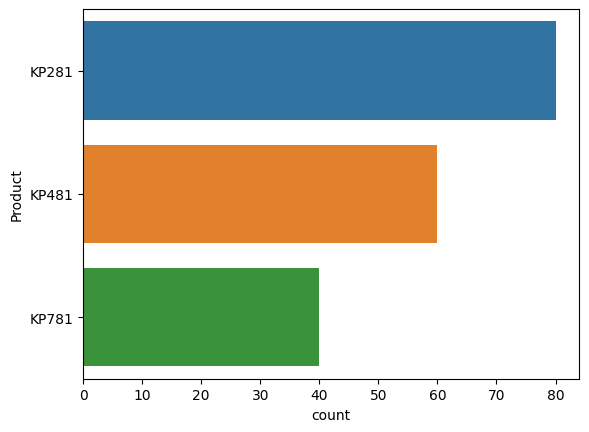

In [ ]:
sns.countplot(data=data, y = "Product")

* Most Sold Product is KP281


**Gender**

<function matplotlib.pyplot.show(close=None, block=None)>

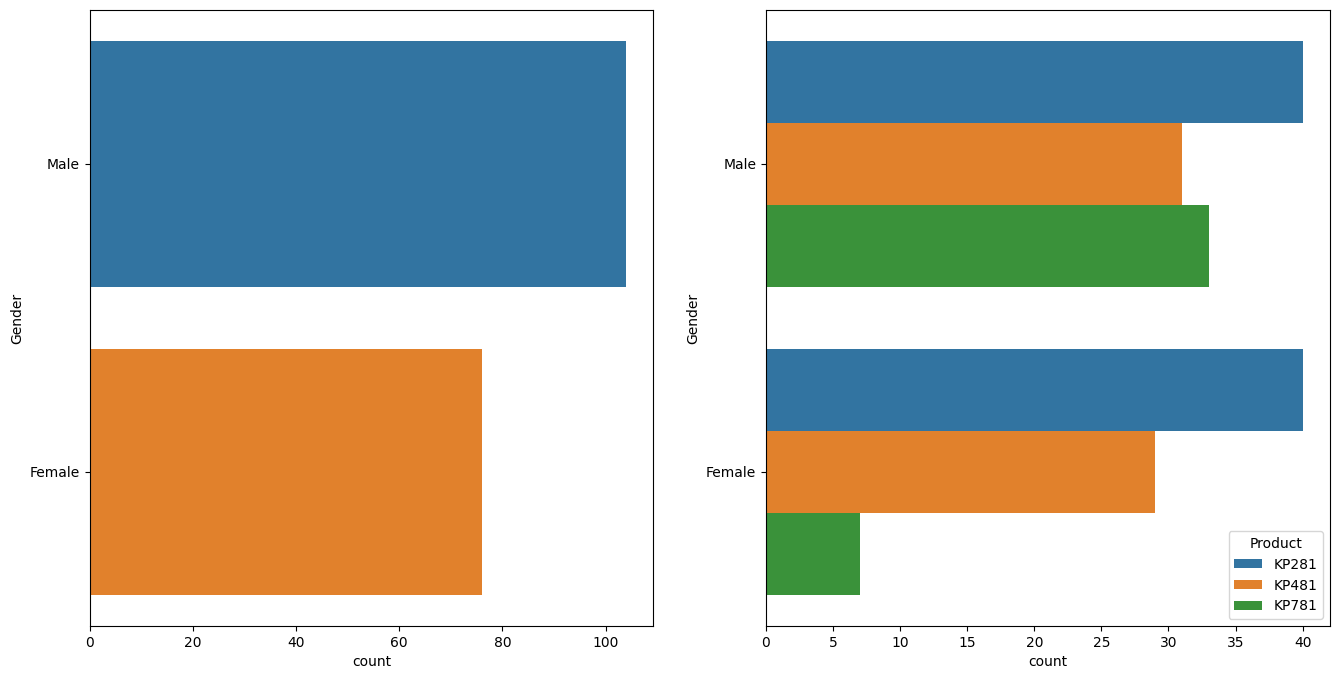

In [ ]:
plt.figure(figsize = (16,8))
plt.subplot(1,2,1)
sns.countplot(data=data,y="Gender")
plt.subplot(1,2,2)
sns.countplot(data=data,y="Gender",hue= "Product")
plt.show

* Male Buy More Product in Aerofit than Female Customers
* Male : Female Ratio of KP281,KP481 is almost same
* But in case of KP781, it is majorly preferred by Male Customers

**Education**

<function matplotlib.pyplot.show(close=None, block=None)>

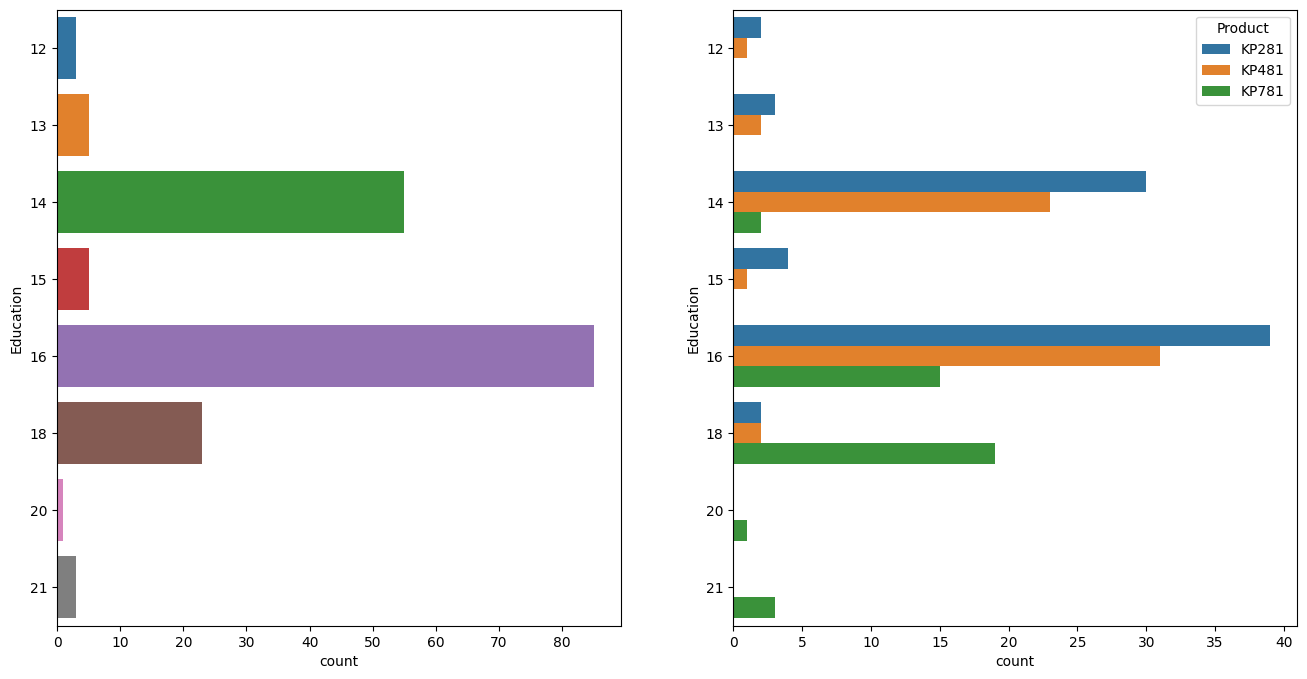

In [ ]:
plt.figure(figsize = (16,8))
plt.subplot(1,2,1)
sns.countplot(data=data,y="Education")
plt.subplot(1,2,2)
sns.countplot(data=data,y="Education",hue= "Product")
plt.show

In [ ]:
dataC["Education"] = pd.cut(data["Education"],bins=[10,12,14,16,18,22],labels=[1,2,3,4,5],right = True)

converting education in year into Categories
* 12  --> 1  (Highser Secondary)
* 13,14 --> 2 (Diploma)
* 15,16 --> 3 (Graduate)
* 18 --> 4 (Post Graduate)
* 20,21 --> 5 (Doctorates)

In [ ]:
#dataC["Education"] = pd.cut(data["Education"],bins=[10,12,14,16,18,22],labels=[Higher Secondary,Diploma,Graduate,Post Graduate,Doctorate],right = True)

<function matplotlib.pyplot.show(close=None, block=None)>

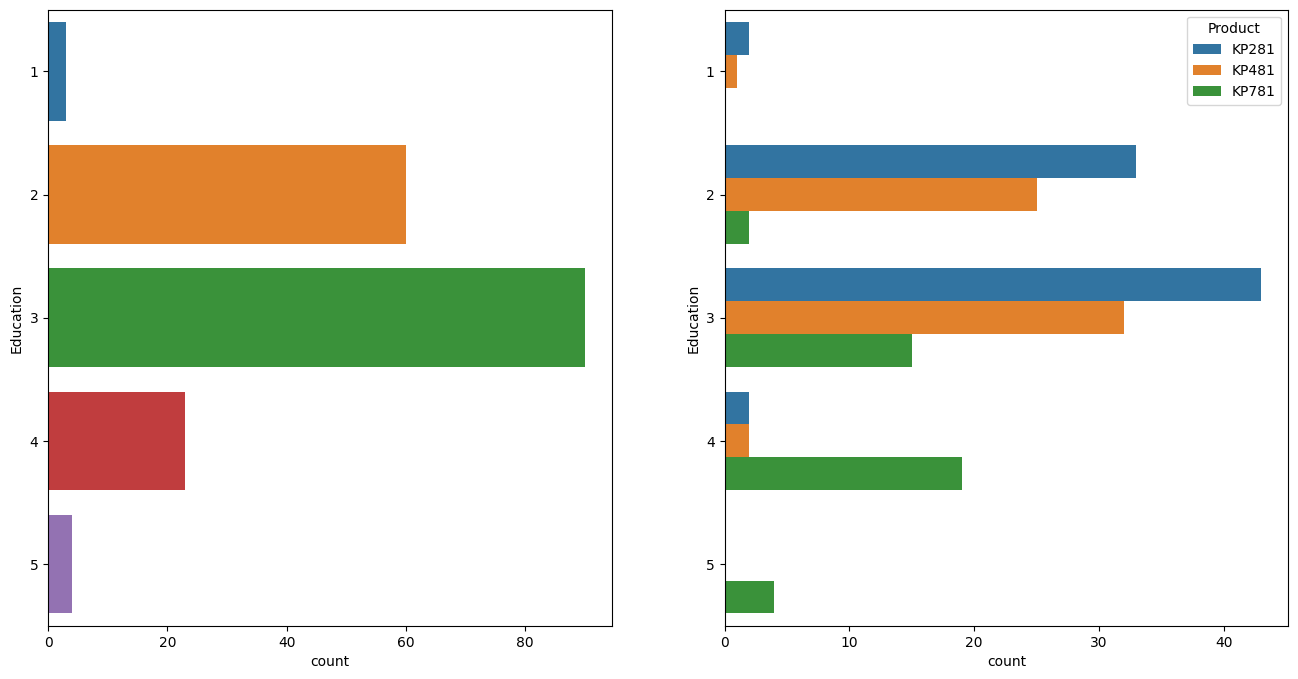

In [ ]:
plt.figure(figsize = (16,8))
plt.subplot(1,2,1)
sns.countplot(data=dataC,y="Education")
plt.subplot(1,2,2)
sns.countplot(data=dataC,y="Education",hue= "Product")
plt.show

* Customers with Education year [15,16] are the major qty customer
* KP281,KP481 are majorly preferred by customer with education year < 16
* KP781 is majorly prefered by customers with education year >= 16

**Age**

<Axes: xlabel='Age', ylabel='Count'>

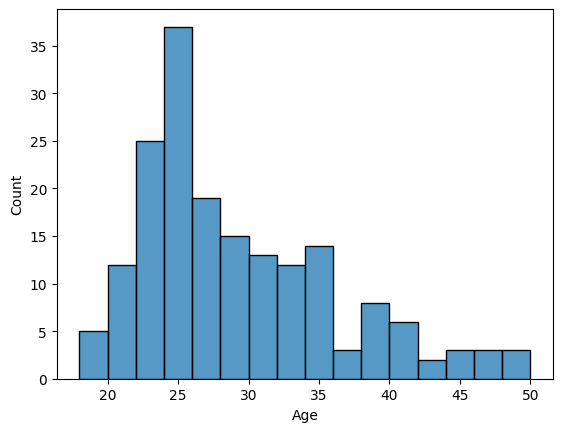

In [ ]:
sns.histplot(data["Age"], bins = 16)

Converting Age into Categories
* 18 ~ 20 --> Tens
* 21 ~ 30 --> Twenties
* 31 ~ 40 --> Thities
* 41 ~ 50 --> Fourties

In [ ]:
dataC["Age"] = pd.cut(data["Age"],bins=[10,20,30,40,50],labels=["Tens","Twenties","Thirties","Fourties"],right = True)

<Axes: xlabel='Age', ylabel='Density'>

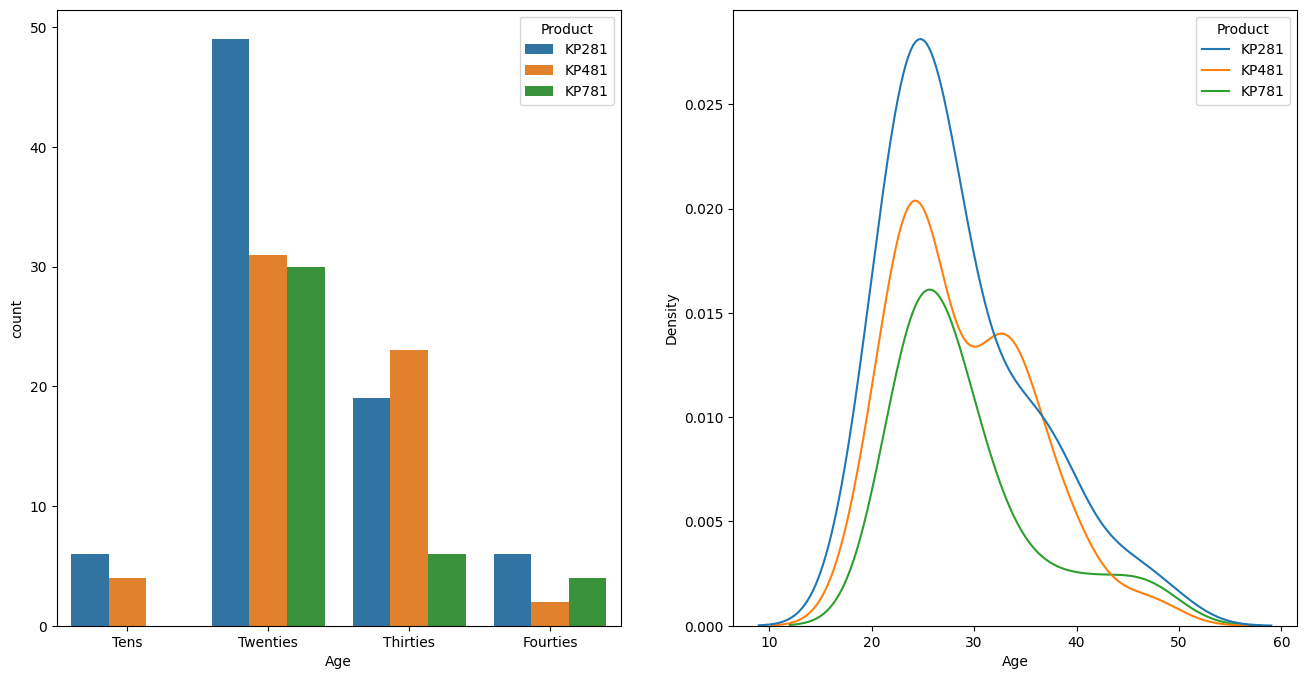

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.countplot(data=dataC, x="Age", hue = "Product")
plt.subplot(1,2,2)
sns.kdeplot(data= data, x=data["Age"],hue="Product")

* Twenties majorly prefers KP281
* KP481 is preferred by Twenties and however Customers in Thirties Majorly prefer it
* KP781 is majorly prefered by twenties

**Marital Status**

<function matplotlib.pyplot.show(close=None, block=None)>

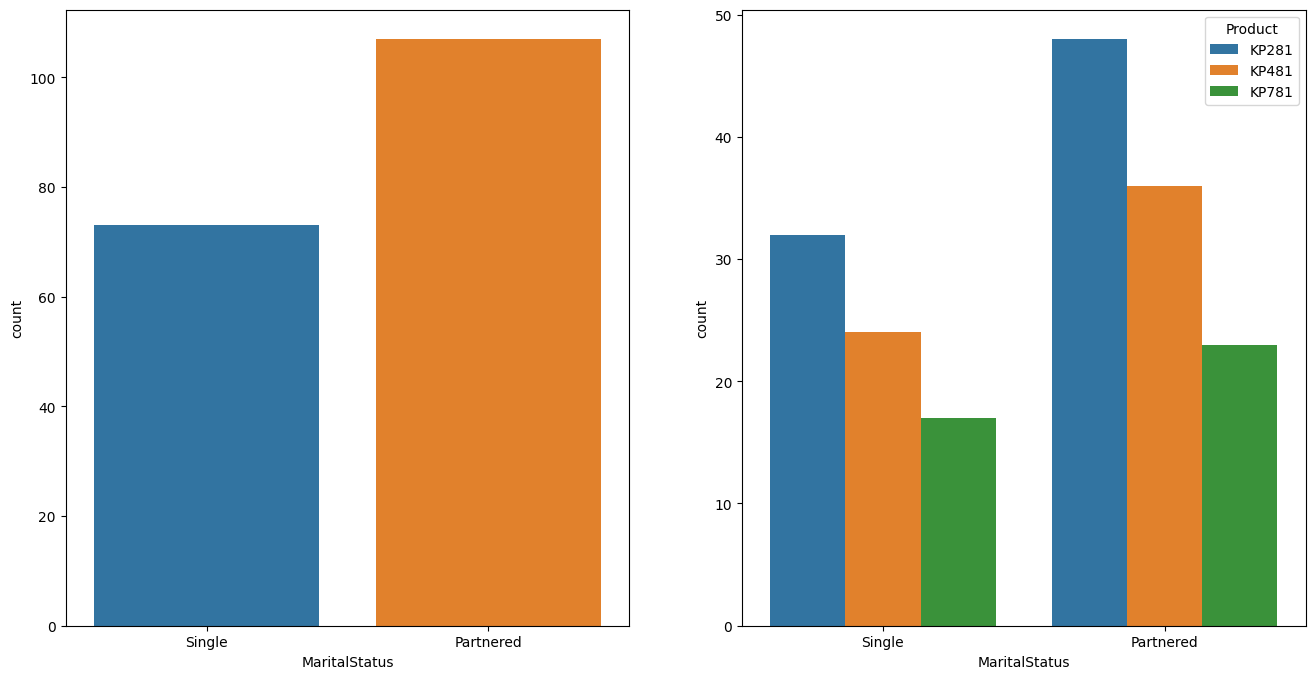

In [ ]:
plt.figure(figsize = (16,8))
plt.subplot(1,2,1)
sns.countplot(data=data, x="MaritalStatus")
plt.subplot(1,2,2)
sns.countplot(data=data, x="MaritalStatus",hue= "Product")
plt.show

* Parterned are the Major Customer Base
* However Product Selection has no impact of Marital Status

**Usage (No of Times used in a week)**

<function matplotlib.pyplot.show(close=None, block=None)>

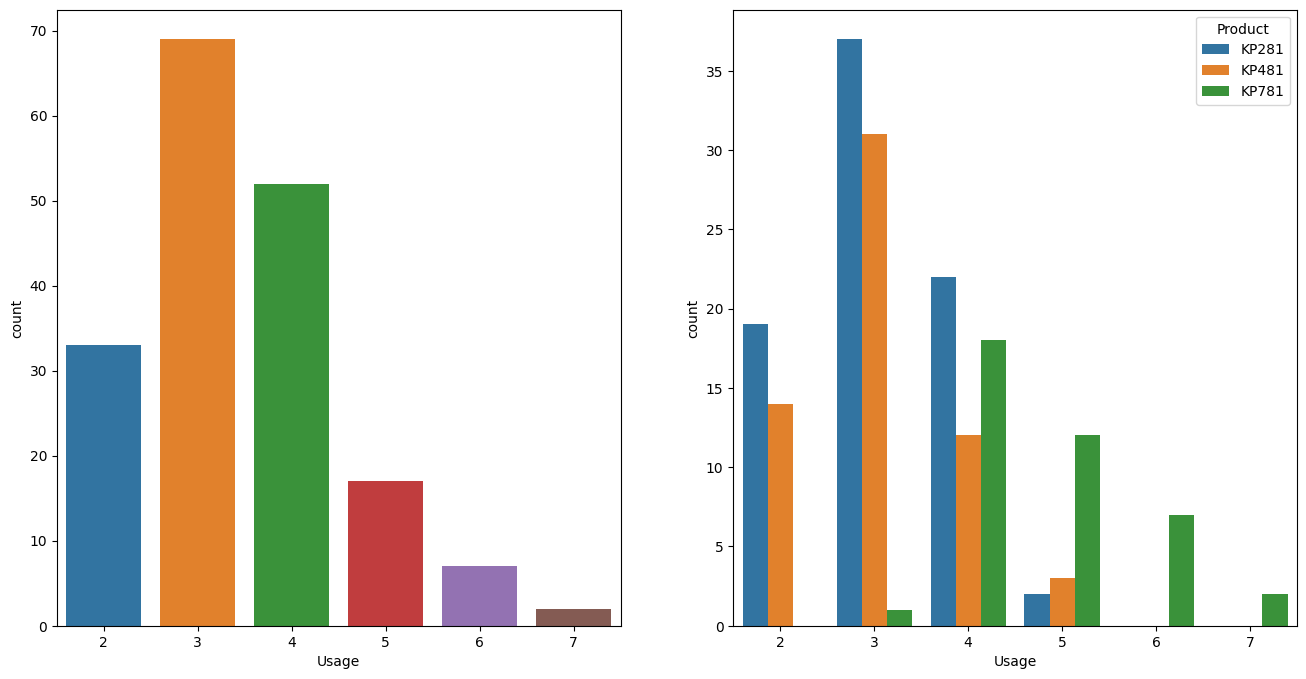

In [ ]:
plt.figure(figsize = (16,8))
plt.subplot(1,2,1)
sns.countplot(data=data, x="Usage")
plt.subplot(1,2,2)
sns.countplot(data=data, x="Usage",hue= "Product")
plt.show

* Customer with weekly usage <=3 prefer KP281 & KP481
* Customer with weekly usage >=5 prefer KP781

**Fitness**

<function matplotlib.pyplot.show(close=None, block=None)>

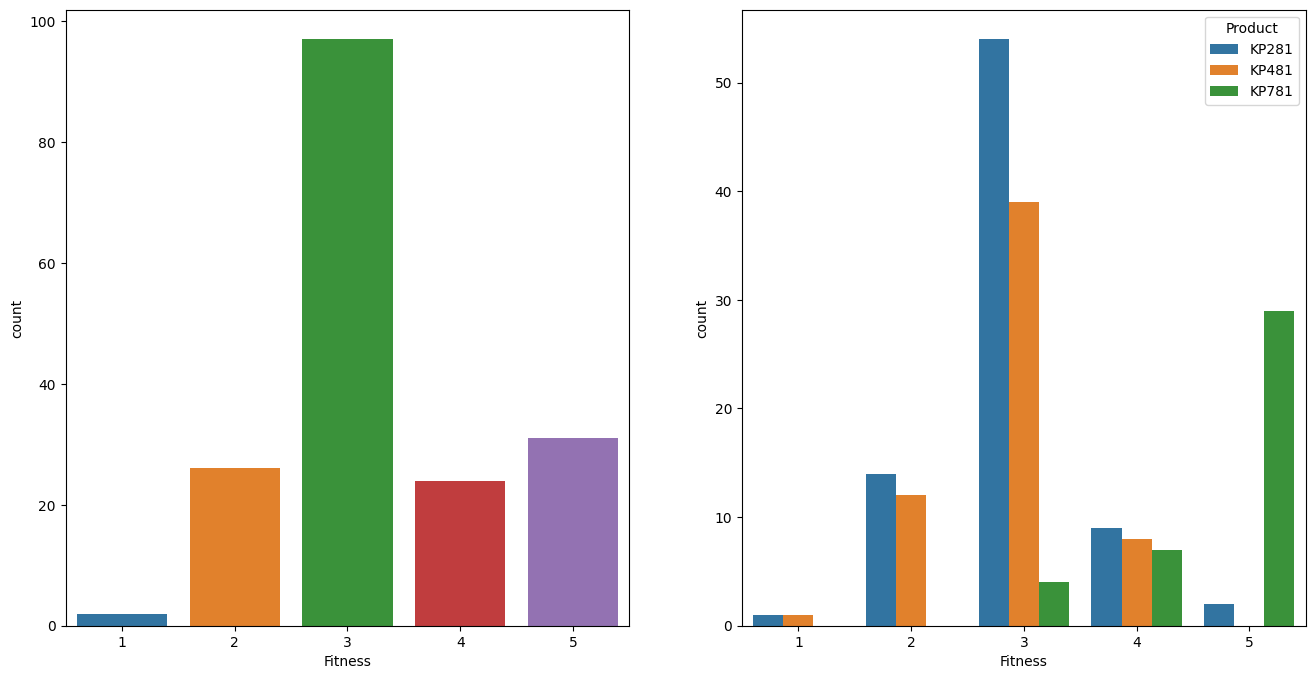

In [ ]:
plt.figure(figsize = (16,8))
plt.subplot(1,2,1)
sns.countplot(data=data, x="Fitness")
plt.subplot(1,2,2)
sns.countplot(data=data, x="Fitness",hue= "Product")
plt.show

* Majority of Customer rate theit fitness as "3"
* Customers rating themselves >=3 prefer KP281 & KP481
* Customers ratings themselves as "5" prefer to buy KP781

**Income**

<Axes: xlabel='Income', ylabel='Count'>

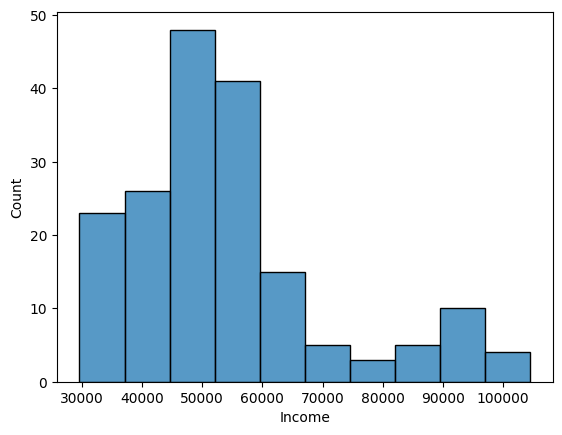

In [ ]:
sns.histplot(data= data ,x = data["Income"], bins = 10)

Converting Income into Catogories  base on the Histogram Plot
* 25000 ~ 45000 --> low
* 45000 ~ 70000 --> Medium
* 70000 ~ 90000 --> High
* 90000 ~ 110000 --> Very High

In [ ]:
dataC["Income"] = pd.cut(data["Income"],bins=[25000,45000,70000,90000,110000],labels=["Low","Medium","High","Very High"],right = True)

<Axes: xlabel='Income', ylabel='Density'>

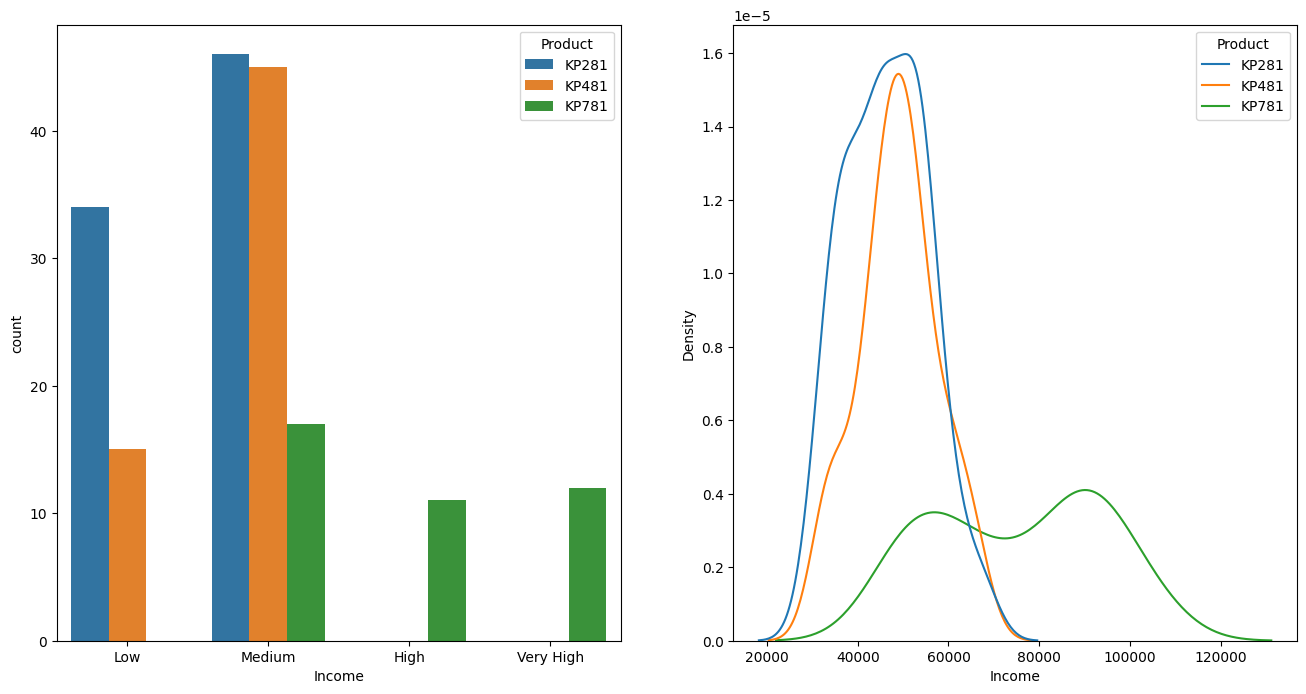

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.countplot(data=dataC,x="Income",hue="Product")
plt.subplot(1,2,2)
sns.kdeplot(data=data,x="Income",hue="Product")

* Customers with income > 75000 prefer to buy KP781
* Customers with Income [45000,70000] equally prefer KP281,KP481
* Customer with income < 45000 prefer KP281

<Axes: xlabel='Miles', ylabel='Count'>

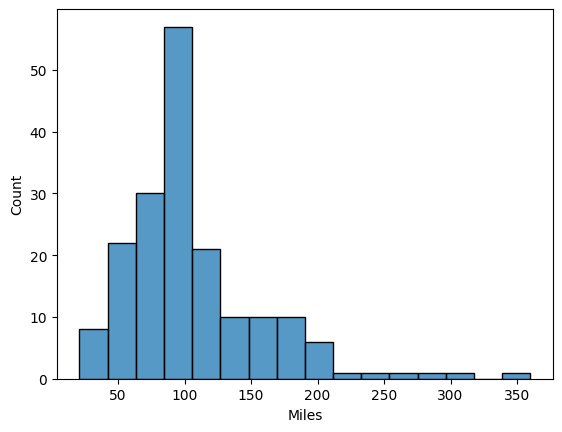

In [ ]:
sns.histplot(data["Miles"], bins = 16)

Converting Miles into Catogories base on the Histogram Plot
* 0 ~ 75 --> low
* 75 ~ 150 --> Medium
* 150 ~ 225 --> High
* 225 ~ 375 --> Very High

In [ ]:
dataC["Miles"] = pd.cut(data["Miles"],bins=[0,75,150,225,375],labels=["low","Medium","High","Very High"],right = True)

<Axes: xlabel='Miles', ylabel='Density'>

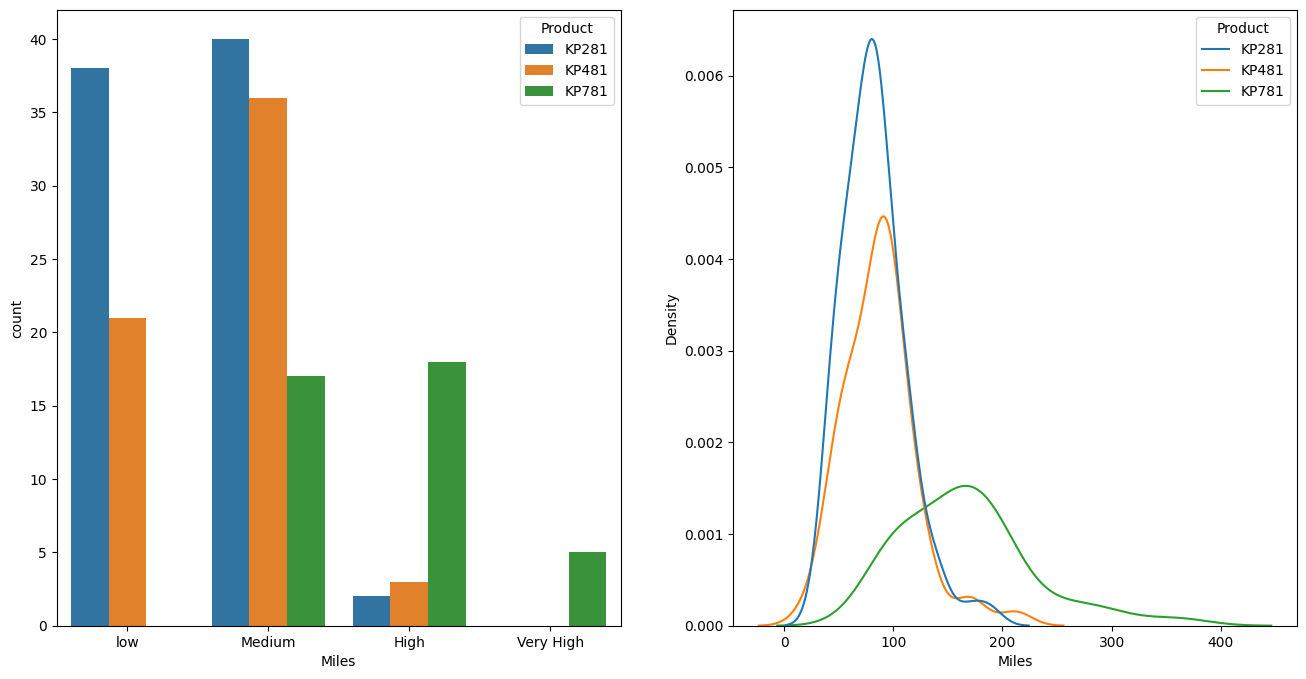

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.countplot(data=dataC,x="Miles",hue="Product")
plt.subplot(1,2,2)
sns.kdeplot(data=data,x="Miles",hue="Product")

* Customers with Miles > 225 prefer to buy KP781
* Customers with Miles [75,150]  equally prefers KP281, KP481 & next prefers KP781
* Customers with Miles < 75 highly prefers KP281 and next KP481 but never KP781

In [ ]:
dataC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    object  
 1   Age            180 non-null    category
 2   Gender         180 non-null    object  
 3   Education      180 non-null    category
 4   MaritalStatus  180 non-null    object  
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    category
 8   Miles          180 non-null    category
dtypes: category(4), int64(2), object(3)
memory usage: 8.7+ KB


In [ ]:
print ("Category : Nunique , Max , Min")
print("-------------------------------")
for i in dataC.columns:
  print(i, ":", dataC[i].nunique(),",", dataC[i].max(),",",dataC[i].min())

Category : Nunique , Max , Min
-------------------------------
Product : 3 , KP781 , KP281
Age : 4 , Fourties , Tens
Gender : 2 , Male , Female
Education : 5 , 5 , 1
MaritalStatus : 2 , Single , Partnered
Usage : 6 , 7 , 2
Fitness : 5 , 5 , 1
Income : 4 , Very High , Low
Miles : 4 , Very High , low


# **Bussiness Insights**

# **Recommendations**